In [1]:
# Installing and Loading the Necessary Packages

install.packages("quantmod")
library(quantmod)

install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Fetch historical stock data for Apple Inc. (AAPL) from Yahoo Finance
getSymbols("AAPL", from = "2020-01-01", to = "2021-12-31")

# View the first few rows of the data
head(AAPL)

[1] "AAPL"

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2020-01-02   74.0600   75.1500  73.7975    75.0875   135480400      72.96047
2020-01-03   74.2875   75.1450  74.1250    74.3575   146322800      72.25115
2020-01-06   73.4475   74.9900  73.1875    74.9500   118387200      72.82685
2020-01-07   74.9600   75.2250  74.3700    74.5975   108872000      72.48434
2020-01-08   74.2900   76.1100  74.2900    75.7975   132079200      73.65035
2020-01-09   76.8100   77.6075  76.5500    77.4075   170108400      75.21474

**Data Preprocessing**

In [3]:
# Clean the data by removing missing values
AAPL_clean <- na.omit(AAPL)

# Calculate daily returns
AAPL_clean$Returns <- dailyReturn(AAPL_clean$AAPL.Adjusted)

# Remove outliers using z-score (assuming you have 'zoo' package installed)
library(zoo)
z_scores <- scale(AAPL_clean$Returns)
AAPL_clean <- AAPL_clean[abs(z_scores) < 3, ]

# Check summary statistics of the cleaned data
summary(AAPL_clean$Returns)

     Index               Returns         
 Min.   :2020-01-02   Min.   :-0.067295  
 1st Qu.:2020-07-09   1st Qu.:-0.008163  
 Median :2021-01-07   Median : 0.001474  
 Mean   :2021-01-05   Mean   : 0.001821  
 3rd Qu.:2021-07-06   3rd Qu.: 0.013852  
 Max.   :2021-12-30   Max.   : 0.072022  

**Basic Stock Data Analysis**

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 49 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_line()`).”


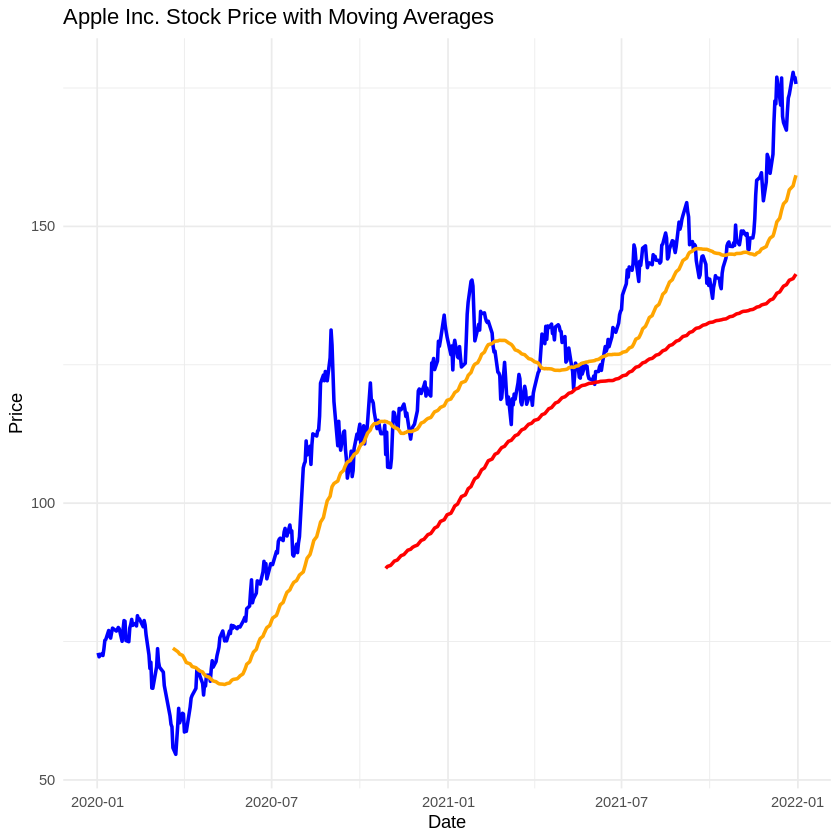

In [4]:
# Calculate 50-day and 200-day moving averages
AAPL_clean$MA_50 <- SMA(AAPL_clean$AAPL.Adjusted, n = 50)
AAPL_clean$MA_200 <- SMA(AAPL_clean$AAPL.Adjusted, n = 200)

# Calculate historical volatility
AAPL_clean$Volatility <- runSD(AAPL_clean$Returns, n = 20) * sqrt(252)

# Visualize stock data with moving averages and volatility
ggplot(data = AAPL_clean, aes(x = Index)) +
  geom_line(aes(y = AAPL.Adjusted), color = "blue", size = 1) +
  geom_line(aes(y = MA_50), color = "orange", size = 1) +
  geom_line(aes(y = MA_200), color = "red", size = 1) +
  labs(title = "Apple Inc. Stock Price with Moving Averages",
       x = "Date", y = "Price") +
  theme_minimal()

**Plot the closing price of AAPL**

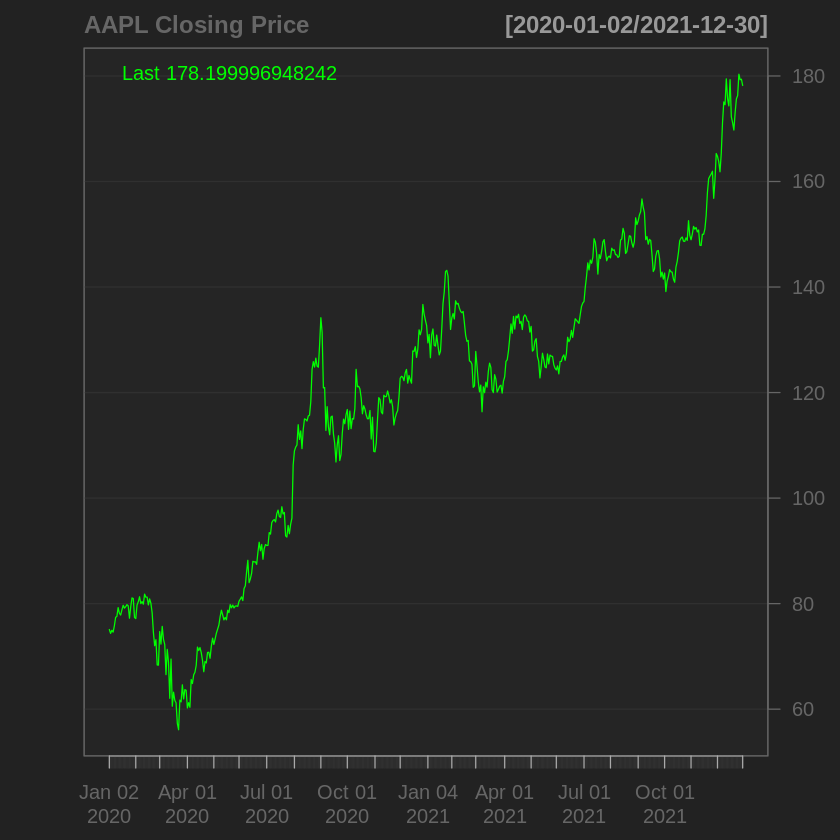

In [5]:
# Plot the closing price of AAPL
chartSeries(AAPL$AAPL.Close, type = "line", name = "AAPL Closing Price")

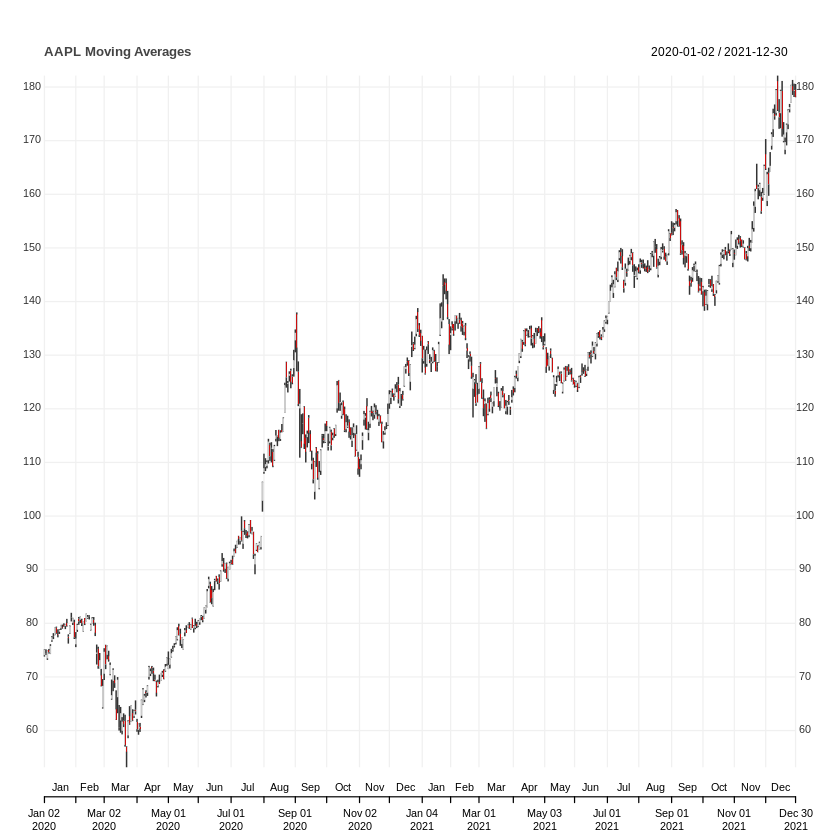

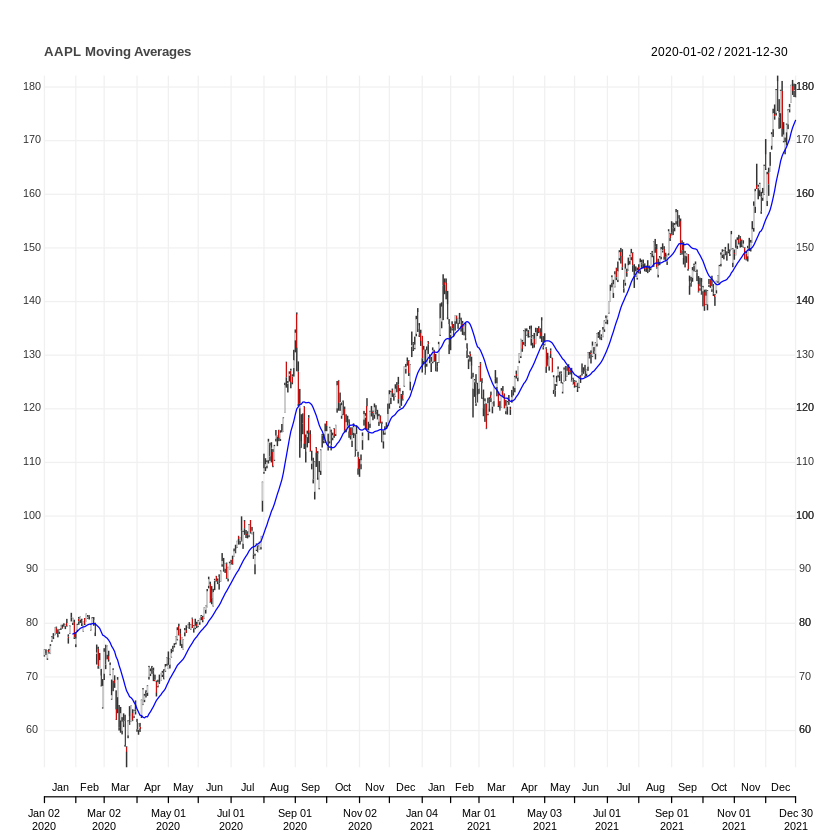

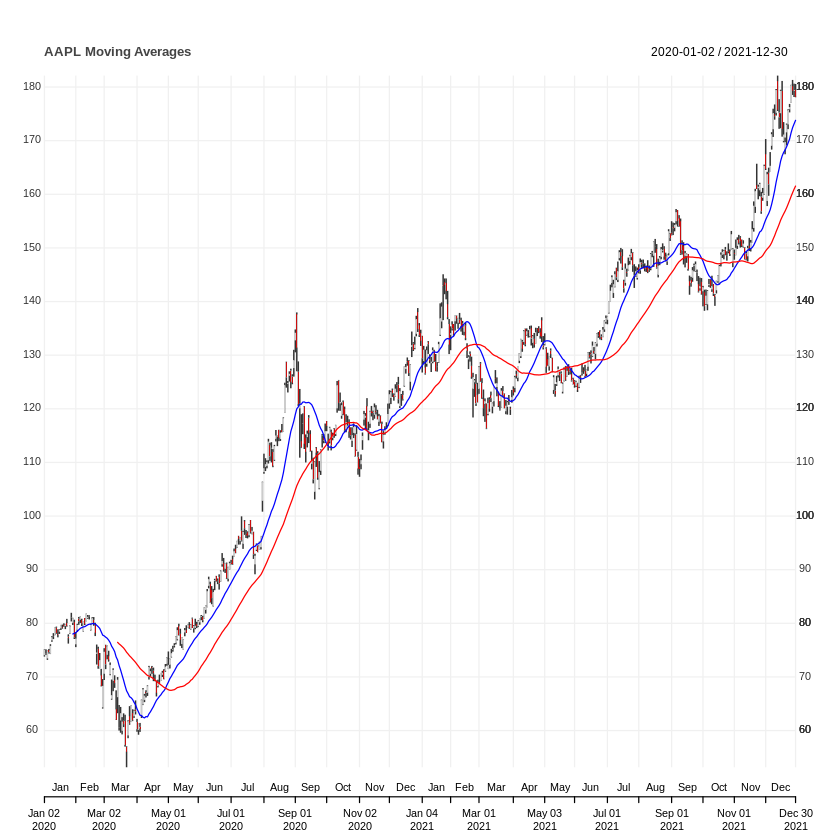

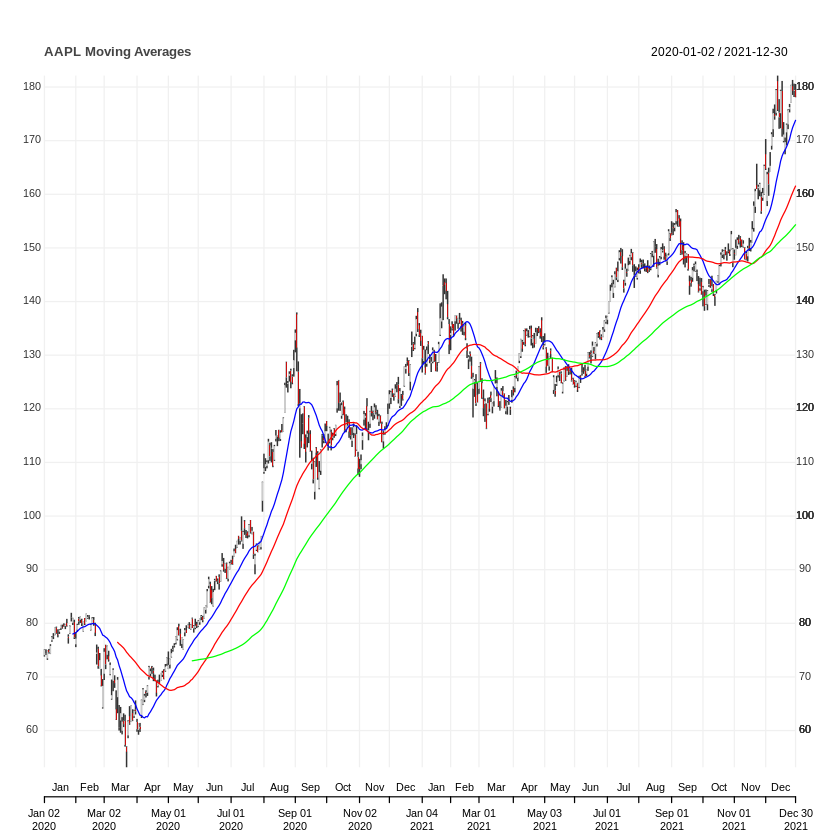

In [6]:
# Calculate 20-day, 50-day and 200-day moving averages
AAPL$SMA_20 <- SMA(AAPL$AAPL.Close, n = 20)
AAPL$SMA_50 <- SMA(AAPL$AAPL.Close, n = 50)
AAPL$SMA_100 <- SMA(AAPL$AAPL.Close, n = 100)

# Plot the moving averages
chart_Series(AAPL, name = "AAPL Moving Averages")
add_TA(AAPL$SMA_20, on = 1, col = "blue", lty = 1)
add_TA(AAPL$SMA_50, on = 1, col = "red", lty = 1)
add_TA(AAPL$SMA_100, on = 1, col = "green", lty = 1)

**Conclusion**

In conclusion, a key component of making wise investing choices in the financial markets is stock data analysis. Trading and investing professionals can evaluate trends, momentum, and probable entry or exit points for stocks and other financial instruments by comprehending and using a variety of technical indicators, such as the Moving Average Convergence Divergence (MACD) and Relative Strength Index (RSI).